In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential # Adding elements in a sequence
from keras.layers import Dense
from keras.optimizers import Adam, SGD # Change our weights and biases
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [2]:
housing_data = pd.read_csv('data/housing-data.csv')
housing_data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


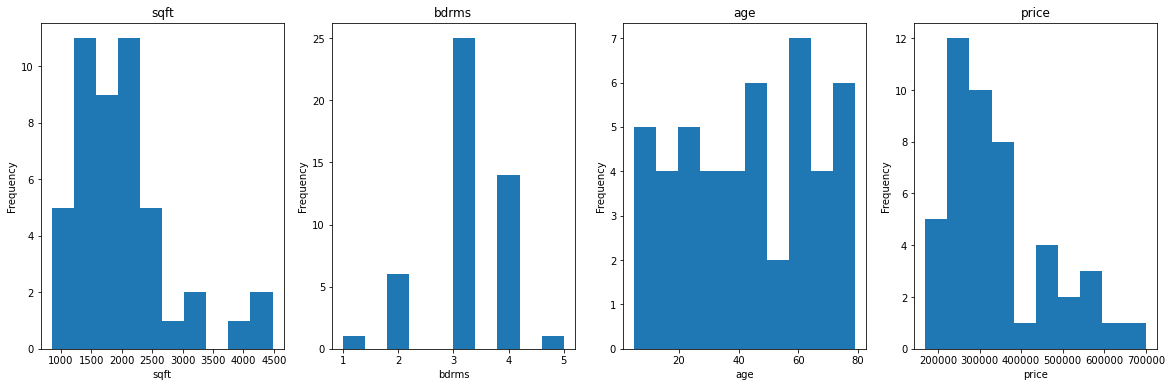

In [3]:
plt.figure(figsize=(20,6))
for i,feature in enumerate(housing_data.columns):
    plt.subplot(1,4,i+1)
    housing_data[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)
    

In [4]:
# Feature Processing
mms = MinMaxScaler()
housing_data['sqft'] = mms.fit_transform(housing_data[['sqft']])
# Didn't alter bdrms
housing_data['age'] = mms.fit_transform(housing_data[['age']])
housing_data['price'] = mms.fit_transform(housing_data[['price']])

housing_data.head()

,sqft,bdrms,age,price
0,0.345284,3,0.878378,0.433962
1,0.206288,3,0.310811,0.301887
2,0.426917,3,0.527027,0.375660
3,0.155543,2,0.594595,0.117170
4,0.592388,4,0.945946,0.698113


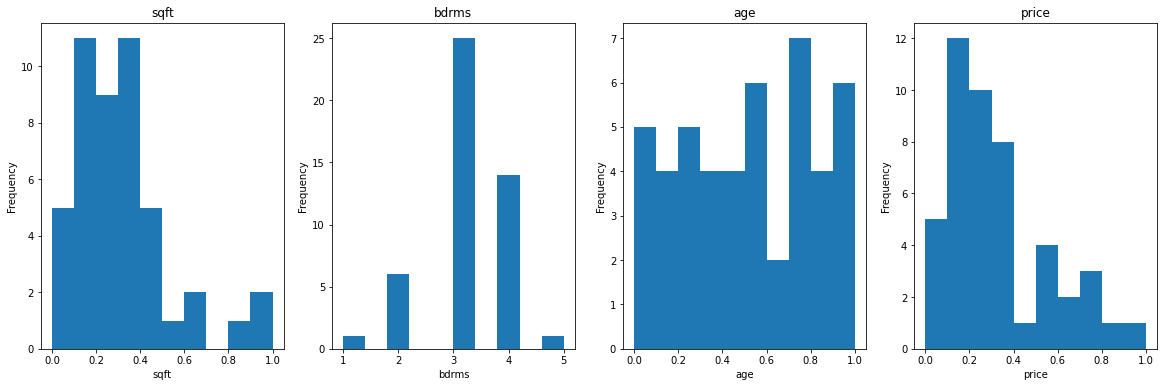

In [5]:
plt.figure(figsize=(20,6))
for i,feature in enumerate(housing_data.columns):
    plt.subplot(1,4,i+1)
    housing_data[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)
    

In [6]:
y = housing_data['price'].values
X = housing_data.loc[:, housing_data.columns != 'price'].values

In [7]:
model = Sequential()
model.add(Dense(1,input_shape=(3,)))
model.compile(Adam(lr=0.8),'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
params = model.get_weights()
print(params)
params = [np.zeros(w.shape) for w in params] # much more efficient
model.set_weights(params)
print(params)

[array([[ 0.61935127],
       [ 0.3211689 ],
       [-0.0528661 ]], dtype=float32), array([0.], dtype=float32)]
[array([[0.],
       [0.],
       [0.]]), array([0.])]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [10]:
model.fit(X_train,y_train,epochs=60)

Epoch 1/60
2/2 [==============================] - 0s 768us/step - loss: 2.2116
Epoch 2/60
2/2 [==============================] - 0s 786us/step - loss: 1.2750
Epoch 3/60
2/2 [==============================] - 0s 631us/step - loss: 7.8453
Epoch 4/60
2/2 [==============================] - 0s 644us/step - loss: 1.1975
Epoch 5/60
2/2 [==============================] - 0s 651us/step - loss: 2.5548
Epoch 6/60
2/2 [==============================] - 0s 696us/step - loss: 2.9296
Epoch 7/60
2/2 [==============================] - 0s 908us/step - loss: 0.1584
Epoch 8/60
2/2 [==============================] - 0s 894us/step - loss: 1.6451
Epoch 9/60
2/2 [==============================] - 0s 1ms/step - loss: 0.9257
Epoch 10/60
2/2 [==============================] - 0s 1ms/step - loss: 0.1399
Epoch 11/60
2/2 [==============================] - 0s 1ms/step - loss: 0.9013
Epoch 12/60
2/2 [==============================] - 0s 840us/step - loss: 0.2718
Epoch 13/60
2/2 [==============================] - 0s 9

In [11]:
y_pred = model.predict(X_test)

In [12]:
r2_score(y_test,y_pred)

0.5460729211660477

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [13]:
hr_data = pd.read_csv("data/HR_comma_sep.csv")
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


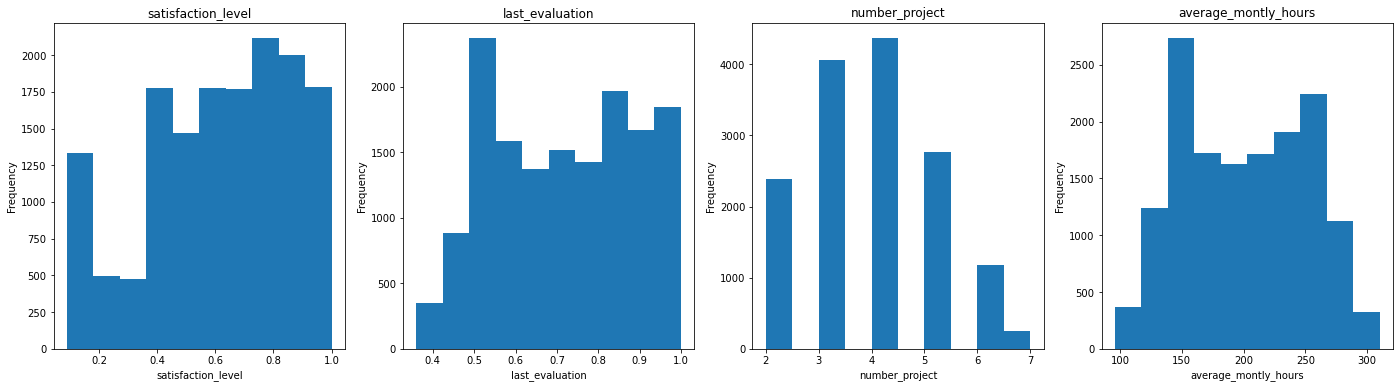

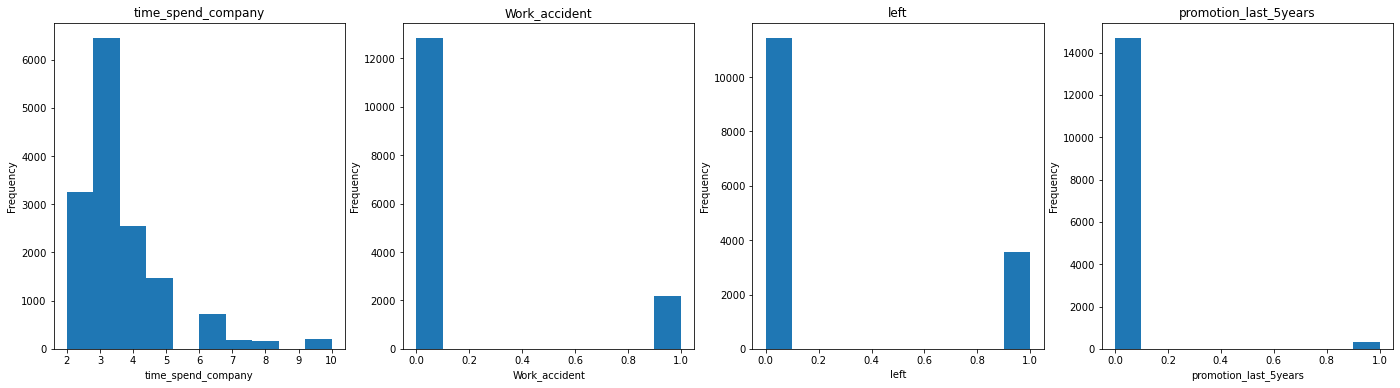

In [14]:
plt.figure(figsize=(24,6))
for i,feature in enumerate(hr_data.columns[:4]):
    plt.subplot(1,4,i+1)
    hr_data[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)

plt.figure(figsize=(24,6))   
for i,feature in enumerate(hr_data.columns[4:8]):
    plt.subplot(1,4,i+1)
    hr_data[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)
    

In [15]:
# Feature Processing
hr_data['average_montly_hours'] = mms.fit_transform(hr_data[['average_montly_hours']])
hr_data.rename(columns={'sales':'position'}, inplace=True)
hr_data = pd.get_dummies(hr_data,columns=['position','salary'])

In [16]:
# hr_data.join(positions,how='left')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,position_IT,position_RandD,...,position_hr,position_management,position_marketing,position_product_mng,position_sales,position_support,position_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,0.285047,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.775701,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.822430,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.593458,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,0.294393,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
y = hr_data['left'].values
X = hr_data.loc[:, hr_data.columns != 'left'].values

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [19]:
len(hr_data.loc[:, hr_data.columns != 'left'].columns)

20

In [20]:
model = Sequential()
model.add(Dense(1,input_shape=(20,)))
model.compile(SGD(lr=.5),
              'binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,epochs=60)

Epoch 1/60
375/375 [==============================] - 0s 552us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 2/60
375/375 [==============================] - 0s 551us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 3/60
375/375 [==============================] - 0s 632us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 4/60
375/375 [==============================] - 0s 605us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 5/60
375/375 [==============================] - 0s 587us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 6/60
375/375 [==============================] - 0s 559us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 7/60
375/375 [==============================] - 0s 580us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 8/60
375/375 [==============================] - 0s 584us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 9/60
375/375 [==============================] - 0s 587us/step - loss: 3.6946 - accuracy: 0.7605
Epoch 10/60
375/375 [==============================] - 0s 636us/step - loss: 3.694

In [22]:
y_pred = model.predict(X_test) > 0.5

In [23]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
def pretty_confusion_matrix(y_true,y_pred,labels =['False','True']):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index=labels,columns=pred_labels)
    return df

In [25]:
pretty_confusion_matrix(y_test,y_pred,['left','stayed'])

,Predicted left,Predicted stayed
left,2303,0
stayed,697,0


In [26]:
print(f'Precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')

Precision: 0.0
Recall: 0.0


/Users/kinkadedarling/anaconda3/envs/fds/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
def build_log_regression():
    model = Sequential()
    model.add(Dense(1,input_shape=(20,),activation='sigmoid'))
    model.compile(SGD(lr=.5),
                  'binary_crossentropy',
                 metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_log_regression,epochs=25,verbose=0)

In [30]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(model,X,y,cv=cv)

In [31]:
scores

array([0.77266669, 0.79299998, 0.78333336, 0.52633333, 0.6335445 ])

In [29]:
print(scores.mean())
print(scores.std())


0.7649199962615967
0.018904875139480824
